<a href="https://colab.research.google.com/github/Swaraj-CSE-AI/My-ML-Project/blob/main/ML_Project_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Library Imports & Environment Setup

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/PRSA_Data_Aotizhongxin_20130301-20170228.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Data Loading

In [5]:
filePath = '/content/PRSA_Data_Aotizhongxin_20130301-20170228.csv'
data = pd.read_csv(filePath).drop(columns=['No','station'],axis=1)
data

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4
35060,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9
35061,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1
35062,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2


Data Analysis

In [6]:
data.columns

Index(['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM'],
      dtype='object')

In [7]:
data.isnull().sum()

,0
year,0
month,0
day,0
hour,0
PM2.5,925
PM10,718
SO2,935
NO2,1023
CO,1776
O3,1719


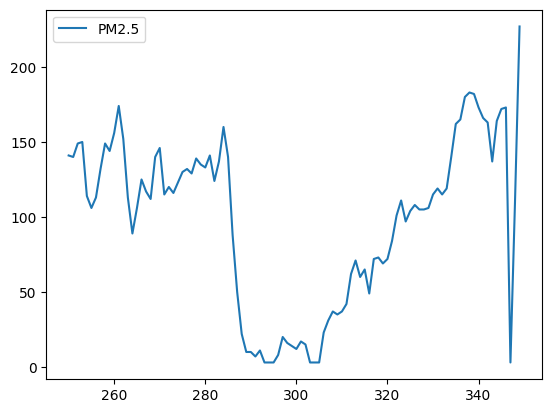

In [8]:
plt.plot(data['PM2.5'][250:350], label='PM2.5')
plt.legend(loc="best")

In [9]:
data['wd'].value_counts()

,count
wd,
NE,5140
ENE,3950
SW,3359
E,2608
NNE,2445
WSW,2212
SSW,2098
N,2066
NW,1860


In [10]:
data['wd'] = data['wd'].fillna(data['wd'].mode().iloc[0])

data['wd'].value_counts()

,count
wd,
NE,5221
ENE,3950
SW,3359
E,2608
NNE,2445
WSW,2212
SSW,2098
N,2066
NW,1860


Missing Value Handling

In [11]:
data.interpolate(method='linear', inplace=True)

/tmp/ipython-input-11-2330188900.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(method='linear', inplace=True)


In [12]:
data.isnull().sum()

,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0
O3,0


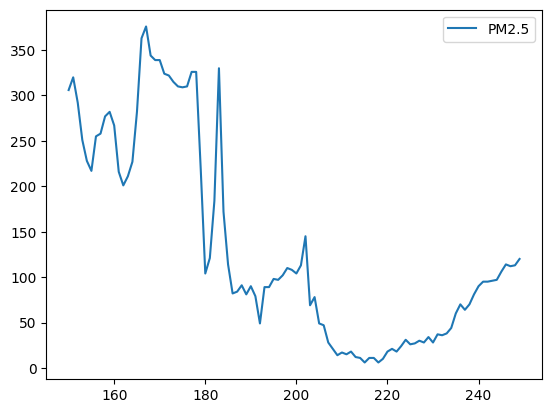

In [13]:
plt.plot(data['PM2.5'][150:250], label='PM2.5')
plt.legend(loc="best")

Feature Encoding and Data Normalization

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score

label_encoder = preprocessing.LabelEncoder()
data['wd'] = label_encoder.fit_transform(data['wd'])


newdata = data.drop(columns=['year', 'month', 'day', 'hour'])
# print(X) #.reshape(-1,1))
# y = data['PM2.5']
# print(y.head())
newdata.head()

scaler = StandardScaler()
scaled_newdata = scaler.fit_transform(newdata)
scaled_newdata

array([[-0.95833567, -1.11493519, -0.59286734, ..., -0.07406422,
        -0.11448295,  2.23509782],
       [-0.90952854, -1.07294537, -0.59286734, ..., -0.07406422,
        -0.75556307,  2.48423346],
       [-0.92173032, -1.08344282, -0.54881828, ..., -0.07406422,
        -0.11448295,  3.23164037],
       ...,
       [-0.81191427, -0.76851913, -0.32857299, ..., -0.07406422,
         0.09921043, -0.50539421],
       [-0.75090535, -0.69503693, -0.24047487, ..., -0.07406422,
        -0.11448295, -0.422349  ],
       [-0.77530892, -0.83150387, -0.32857299, ..., -0.07406422,
        -0.32817632, -0.33930378]])

Data windowing

In [15]:
def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = df_as_np[i:i+window_size]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

WINDOW_SIZE = 5
X2, y2 = df_to_X_y(newdata, WINDOW_SIZE)
X2.shape, y2.shape

((35059, 5, 12), (35059,))

Splitting the Dataset

In [16]:
X2_train, y2_train = X2[:30000], y2[:30000]
X2_test, y2_test = X2[30000:], y2[30000:]

# Scale the training data
X2_train = scaler.transform(X2_train.reshape(-1, X2_train.shape[-1])).reshape(X2_train.shape)

X2_train.shape, y2_train.shape, X2_test.shape, y2_test.shape

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


((30000, 5, 12), (30000,), (5059, 5, 12), (5059,))

Model Building

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model4 = Sequential()
model4.add(InputLayer((5, 12)))
model4.add(Conv1D(128, kernel_size = 2))
model4.add(Flatten())
model4.add(Dense(64, 'relu'))
model4.add(Dense(32, 'relu'))
model4.add(Dense(16, 'relu'))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 4, 128)         │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,785 (151.50 KB)

 Trainable params: 38,785 (151.50 KB)

 Non-trainable params: 0 (0.00 B)

Compiling the Model

In [18]:
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])

Training the Model

In [28]:
# Scale the test data
X2_test = scaler.transform(X2_test.reshape(-1, X2_test.shape[-1])).reshape(X2_test.shape)

model4.fit(X2_train, y2_train,epochs=100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1422.8805 - root_mean_squared_error: 35.4219
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 468.7935 - root_mean_squared_error: 21.6378
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 393.6212 - root_mean_squared_error: 19.7694
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 395.1105 - root_mean_squared_error: 19.8418
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 396.6042 - root_mean_squared_error: 19.9051
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 398.1166 - root_mean_squared_error: 19.9468
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 364.3551 - root_mean_squared_error: 19.0742
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 377.9802 - root_mean_squared_error: 19.4319
Epoch 9/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 396.3516 - root_mean_squared_error: 19.9028
Epoch 10/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 397.

Prediction & Visualization

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


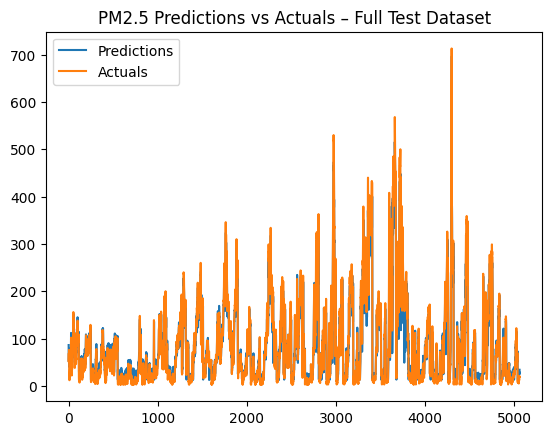

In [30]:
predictions = model4.predict(X2_test).flatten()
df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y2_test})
plt.title('PM2.5 Predictions vs Actuals – Full Test Dataset')
plt.plot(df['Predictions'], label='Predictions')
plt.plot(df['Actuals'], label='Actuals')
plt.legend(loc="best")

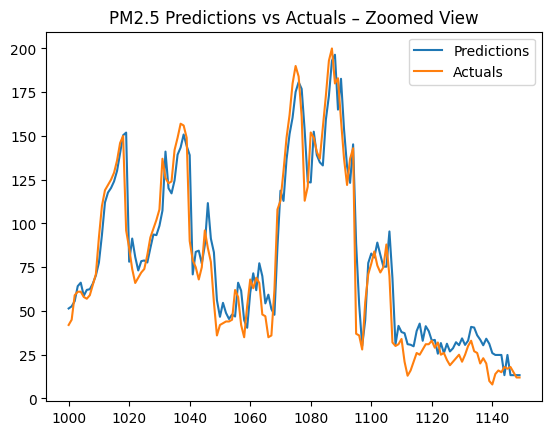

In [31]:
plt.title('PM2.5 Predictions vs Actuals – Zoomed View')
plt.plot(df['Predictions'][1000:1150], label='Predictions')
plt.plot(df['Actuals'][1000:1150], label='Actuals')
plt.legend(loc="best")